# This imports CSV data from CBOE and then processes it 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from datetime import timedelta

In [7]:
#Does not account for market holidays 
def makeFileList(startDate,endDate,directory):
    cDate = startDate 
    fileList = []
    startString = "UnderlyingOptionsIntervalsCalcs_60sec_" 
    endString = ".csv"
    oneDay = timedelta(days=1) #defines a 1day time delta so you can iterate forward one day 
    while(cDate<=endDate): 
        if not ((cDate.weekday()==5) or (cDate.weekday()==6)): #if cDate is saturday or sunday don't do the following thing ADD hol later
            fileName = directory+startString+str(cDate.date())+endString
            fileList.append(fileName)
        cDate = cDate + oneDay

    return fileList

In [3]:
def extractOptionDic(csvFileName,optionD): #for clarity of the code this is not generalized and will only work with CBOD database 
    #this is an array of titles that corresponds to the order in the csv files 
    #for example tiles[3] returns a string root 
    #this makes the code much more readable 
    titles = ['underlying_symbol','quote_datetime','root','expiration','strike','option_type','open','high','low','close','trade_volume','bid_size','bid','ask_size','ask','underlying_bid','underlying_ask','implied_underlying_price','active_underlying_price','implied_volatility	delta','gamma','theta','vega','rho']
    i  = 0 
    csvD = {} #csvDictionary give it a column name and it returns its index 
    for i in range(0, len(titles)): 
        csvD[titles[i]] = i 
    j = 0 
    with open(csvFileName, 'rb') as f: #opens the 
        reader = csv.reader(f)
        for row in reader:
            if (j ==0):  #skips the first header line 
                j = 1 
                continue 
            hashValue =  row[csvD['root']]  + '|' +row[csvD['expiration']]+ '|'+row[csvD['strike']]+'|'+row[csvD['option_type']]
            row[csvD['quote_datetime']] = datetime.strptime(row[csvD['quote_datetime']] ,'%Y-%m-%d %H:%M:%S') #these should be changed to datetime64 
            row[csvD['expiration']] = datetime.strptime(row[csvD['expiration']] +' 16:00:00','%Y-%m-%d %H:%M:%S') #assumes 4:00 est close
            for i in range(csvD['strike'],csvD['rho']+1): #turns all of the float rows into floats 
                if i != csvD['option_type']: #avoids the option time column when trying to float convert 
                    row[i] = float(row[i])

            if not hashValue in optionD: #if the hashValue isn't in option D ...
                dic = {}  #make a new dictionary 
                for title in titles:  #go through the titles array 
                    dic[title] = [row[csvD[title]]] #make a dictionary where the key is the title and the value is a list 
                                                    #where the first enitry is the value in the row under that tile 
                optionD[hashValue] = dic #store the reference to the new dictionary in the optionD dictionary 
            else:
                dic = optionD[hashValue] #dictionary already exists, so get its reference 
                for title in titles: 
                    dic[title].append(row[csvD[title]]) #append the rows to the list 
                    
    return optionD 
    

#### This is the main function for this program. The following block of code takes a while to run

In [ ]:
#this is the "main" method for extracting and processing the data 
startDate = datetime.strptime("2009-03-06","%Y-%m-%d")
endDate = datetime.strptime("2009-03-13","%Y-%m-%d")
directory = "C:/data/"
fileList = makeFileList(startDate,endDate,directory)

#csvFileName = 'C:/data/UnderlyingOptionsIntervalsCalcs_60sec_2009-03-02.csv'
optionD = {} #this is dictionary of all of the different options. Give a hash function, get an option time series 
for csvFileNames in fileList: 
    optionD = extractOptionDic(csvFileNames,optionD)

In [5]:
optionPD = {} #creates a new dictionary of all of the options as a Pandas Dataframe 
nonZeroList = []
for key in optionD: 
    tmp = pd.DataFrame(optionD[key]) #turns the dictionaries into a pandas dataframe
    optionPD[key] = tmp 
    if(tmp["bid"].mean()>100): #this is an efficent way to generate a list of the options you want
        nonZeroList.append(key)

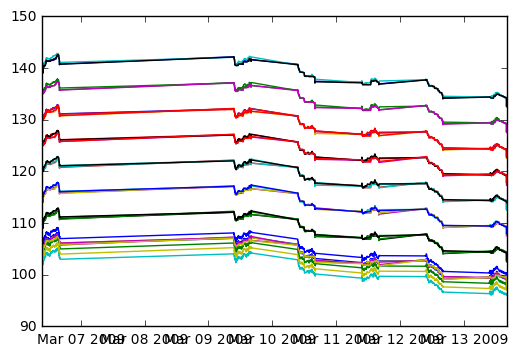

In [6]:
%matplotlib inline
for keys in nonZeroList: 
    tempPD = optionPD[keys] #stores some option PD in tempPD
    plt.plot(tempPD["quote_datetime"],tempPD["bid"])

In [ ]:
#scrap code 
with open("C:/data/filelist.txt") as f: 
    content = f.readlines()
fileList = [x.strip() for x in content]

#this goes through all of the files in the list and 
with open("C:/data/filelist.txt") as f: 
    allWords = f.readlines() 
content = [x.strip() for x in allWords]
print content 


with open("C:/data/filelist.txt") as f: 
    allWords = f.readlines() 
content = [x.strip() for x in allWords]
print content 

optionD = {} 
for index, row in data.iterrows(): 
    if not row['hash'] in optionD:
        stack = []
        stack.append(row)
        optionD[row['hash']]=stack        
    else:
        stack = optionD[row['hash']]
        stack.append(row)
        lastRow = row 
otherData = data[data["bid"]>0]
otherData.sort_values(["expiration"],ascending=[True]).head()

#generate time seris 
def getTimeSeries(pdRowList,yValue):
    time = []
    price = []
    for item in pdRowList:
        time.append(item['quote_datetime'])
        price.append(item[yValue])
    return {'time':time,'y':price} 

#uses the get Time series function to get the time and plot it versus the datetime 
ts = getTimeSeries(optionD["RQQ|2009-03-31|131.0|P"],'underlying_ask')
t = ts['time']
y = ts['y']
plt.plot(t,y)


#this just plots a lot of things. It doesn't work that well 
i = 0 
for key in optionD: 
    i = i + 1 
    ts = getTimeSeries(optionD[key],'theta')
    t = ts['time']
    y = ts['y']
    if((i%37==0) and (optionD[key][1]['option_type'] =="C") and (optionD[key][1]['bid']>0)):
        plt.plot(t,y) 

In [ ]:
#testing functions for makeFileList function 
startDate = datetime.strptime("2009-03-04","%Y-%m-%d")
endDate = datetime.strptime("2009-03-31","%Y-%m-%d")
newList = makeFileList(startDate,endDate,"C:/data/")

print " ------------------------------------------"

print newList